1 - Prepare data

In [282]:
import pandas as pd
import numpy as np
import datetime as date
import matplotlib.pyplot as plt
import time

#Choose the death cases data from hospital.csv from March to August
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv')
df['date'] = pd.date_range('2020-02-1', periods=948, freq='D')
mask = (df['date'] > '2021-5-31') & (df['date'] <= '2022-1-31')
cases_malaysia = df.loc[mask][['date','cases_active','cases_new']]
print(cases_malaysia)

In [283]:
#Choose the death cases data from deaths_malaysia.csv from March to August
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv')
df  = df.groupby('date').sum()
df['date'] = pd.date_range('2020-03-24', periods=890, freq='D')
mask = (df['date'] > '2021-5-31') & (df['date'] <= '2022-1-31')
hospital = df.loc[mask][['beds_covid','beds','admitted_total','hosp_covid','hosp_pui']]
hospital

,beds_covid,beds,admitted_total,hosp_covid,hosp_pui
date,,,,,
2021-06-01,10730,38285,1994,7676,1280
2021-06-02,10824,38318,1875,7587,1175
2021-06-03,10813,38318,1906,7565,1247
2021-06-04,10871,38318,1833,7337,1191
2021-06-05,10896,38318,1992,7457,1082
...,...,...,...,...,...
2022-01-27,9877,40899,964,2002,888
2022-01-28,9794,40827,955,1844,850
2022-01-29,9781,40827,890,2036,912


In [284]:
icu_initial = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/icu.csv')
icu_initial  = icu_initial.groupby('date').sum()
icu_initial['date'] = pd.date_range('2020-03-24',periods=890, freq='D')
mask = (icu_initial['date'] > '2021-5-31') & (icu_initial['date'] <= '2022-1-31')
icu = icu_initial.loc[mask][['icu_covid','beds_icu_covid','icu_pui']]
icu

,icu_covid,beds_icu_covid,icu_pui
date,,,
2021-06-01,1181,1126,9
2021-06-02,1202,1124,11
2021-06-03,1176,1124,14
2021-06-04,1154,1126,11
2021-06-05,1155,1132,12
...,...,...,...
2022-01-27,124,859,0
2022-01-28,127,859,0
2022-01-29,119,859,0


In [285]:
print(hospital)
print(icu)

            beds_covid   beds  admitted_total  hosp_covid  hosp_pui
date                                                               
2021-06-01       10730  38285            1994        7676      1280
2021-06-02       10824  38318            1875        7587      1175
2021-06-03       10813  38318            1906        7565      1247
2021-06-04       10871  38318            1833        7337      1191
2021-06-05       10896  38318            1992        7457      1082
...                ...    ...             ...         ...       ...
2022-01-27        9877  40899             964        2002       888
2022-01-28        9794  40827             955        1844       850
2022-01-29        9781  40827             890        2036       912
2022-01-30        9781  40827             901        2070       927
2022-01-31        9723  40837             864        2064       906

[245 rows x 5 columns]
            icu_covid  beds_icu_covid  icu_pui
date                                         

In [286]:
totalFeatures = pd.merge(hospital, icu, on = "date")
print("The resultant DataFrame:")
print(totalFeatures)

The resultant DataFrame:
            beds_covid   beds  admitted_total  hosp_covid  hosp_pui  \
date                                                                  
2021-06-01       10730  38285            1994        7676      1280   
2021-06-02       10824  38318            1875        7587      1175   
2021-06-03       10813  38318            1906        7565      1247   
2021-06-04       10871  38318            1833        7337      1191   
2021-06-05       10896  38318            1992        7457      1082   
...                ...    ...             ...         ...       ...   
2022-01-27        9877  40899             964        2002       888   
2022-01-28        9794  40827             955        1844       850   
2022-01-29        9781  40827             890        2036       912   
2022-01-30        9781  40827             901        2070       927   
2022-01-31        9723  40837             864        2064       906   

            icu_covid  beds_icu_covid  icu_pui  
da

In [287]:
totalFeatures

,beds_covid,beds,admitted_total,hosp_covid,hosp_pui,icu_covid,beds_icu_covid,icu_pui
date,,,,,,,,
2021-06-01,10730,38285,1994,7676,1280,1181,1126,9
2021-06-02,10824,38318,1875,7587,1175,1202,1124,11
2021-06-03,10813,38318,1906,7565,1247,1176,1124,14
2021-06-04,10871,38318,1833,7337,1191,1154,1126,11
2021-06-05,10896,38318,1992,7457,1082,1155,1132,12
...,...,...,...,...,...,...,...,...
2022-01-27,9877,40899,964,2002,888,124,859,0
2022-01-28,9794,40827,955,1844,850,127,859,0
2022-01-29,9781,40827,890,2036,912,119,859,0


In [288]:
#copied
import numpy as np
# Convert the dataframe to array and join both of the array to combine data
totalFeaturesArray = totalFeatures.to_numpy()


In [289]:
totalFeaturesArray

array([[10730, 38285,  1994, ...,  1181,  1126,     9],
       [10824, 38318,  1875, ...,  1202,  1124,    11],
       [10813, 38318,  1906, ...,  1176,  1124,    14],
       ...,
       [ 9781, 40827,   890, ...,   119,   859,     0],
       [ 9781, 40827,   901, ...,   120,   852,     0],
       [ 9723, 40837,   864, ...,   114,   852,     0]], dtype=int64)

In [290]:
#copied
# Determine multicollinearlity of features (To detmine which models to use)

from statsmodels.stats.outliers_influence import variance_inflation_factor

features_VIF = np.delete(totalFeaturesArray,[0], axis=1).astype('int64')
features_VIF = pd.DataFrame(features_VIF, columns = ['beds','admitted_total', 'hosp_covid', 'hosp_pui', 'icu_covid', 'beds_icu_covid', 'icu_pui'])

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features_VIF.values, i) for i in range(features_VIF.shape[1])]
vif["features"] = features_VIF.columns

vif.round(1) # High correlation, can choose regression model like Ridge, Lasso

,VIF Factor,features
0,109.9,beds
1,179.1,admitted_total
2,148.2,hosp_covid
3,127.2,hosp_pui
4,53.1,icu_covid
5,259.2,beds_icu_covid
6,5.2,icu_pui


In [291]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,10))
scaler.fit(totalFeatures)
scaled_features = scaler.transform(totalFeatures)

In [292]:
scaled_features = pd.DataFrame(scaled_features, columns = ['beds_covid','beds','admitted_total', 'hosp_covid', 'hosp_pui', 'icu_covid', 'beds_icu_covid', 'icu_pui'])
scaled_features
scaled_features_array = scaled_features.to_numpy()

In [293]:
scaled_features = scaled_features.drop(columns=['beds_covid'])
scaled_features

,beds,admitted_total,hosp_covid,hosp_pui,icu_covid,beds_icu_covid,icu_pui
0,1.000000,5.735902,5.093367,5.227692,7.492901,4.210938,2.0125
1,1.061023,5.310564,5.031662,4.258462,7.620690,4.187500,2.2375
2,1.061023,5.421366,5.016409,4.923077,7.462475,4.187500,2.5750
3,1.061023,5.160445,4.858331,4.406154,7.328600,4.210938,2.2375
4,1.061023,5.728753,4.941530,3.400000,7.334686,4.281250,2.3500
...,...,...,...,...,...,...,...
240,5.833779,2.054408,1.159464,1.609231,1.060852,1.082031,1.0000
241,5.700637,2.022240,1.049919,1.258462,1.079108,1.082031,1.0000
242,5.700637,1.789913,1.183037,1.830769,1.030426,1.082031,1.0000
243,5.700637,1.829230,1.206610,1.969231,1.036511,1.000000,1.0000


In [294]:
# target = scaled_features_array[:, [0]].astype('int64')
target = scaled_features_array[:, [0]]
target

array([[ 1.98908654],
       [ 2.08141438],
       [ 2.07061006],
       [ 2.1275783 ],
       [ 2.15213358],
       [ 2.28571429],
       [ 2.2955364 ],
       [ 2.30535851],
       [ 2.633417  ],
       [ 2.67663429],
       [ 2.80432173],
       [ 2.78664193],
       [ 2.84164575],
       [ 2.84164575],
       [ 2.95460002],
       [ 2.92316927],
       [ 2.9261159 ],
       [ 2.93593801],
       [ 2.86325439],
       [ 3.05674997],
       [ 3.02924806],
       [ 3.06362545],
       [ 3.08523409],
       [ 3.06362545],
       [ 3.03121248],
       [ 3.03514133],
       [ 3.14318455],
       [ 3.22372585],
       [ 3.21783259],
       [ 3.2276547 ],
       [ 3.25810324],
       [ 3.26596093],
       [ 3.39266616],
       [ 3.45749209],
       [ 3.64607661],
       [ 3.76197752],
       [ 3.79635491],
       [ 3.89555822],
       [ 3.96922405],
       [ 4.08414275],
       [ 4.21870566],
       [ 4.24424315],
       [ 4.31201572],
       [ 4.29924697],
       [ 4.29433592],
       [ 4

# Split dataset into training and testing

In [295]:
from sklearn.model_selection import train_test_split
# Create train test split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)

# Ridge Regression

In [296]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=1)
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.9611306818506844


time passed : 
0.005017518997192383


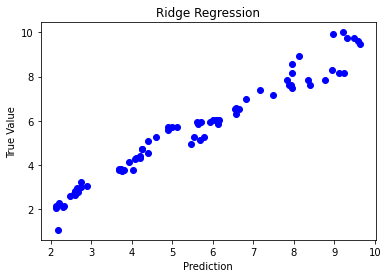

In [326]:
start = time.time()
y_pred = regr.predict(x_test)
end = time.time()
RidgeSpeed = end - start
print('time passed : ')
print(RidgeSpeed)
plt.scatter(y_pred, y_test, color ='b')
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title("Ridge Regression")
plt.show()

In [298]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(regr, x_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.94588744 0.96189739 0.95807009 0.9414017  0.96379713]
Average CV Score:  0.954210751435857
Number of CV Scores used in Average:  5


# Random Forest Regressor

In [299]:
from sklearn.ensemble import RandomForestRegressor
fregr = RandomForestRegressor()
fregr.fit(x_train, y_train)
print(fregr.score(x_test, y_test))

0.9873809622365342


C:\Users\hochi\AppData\Local\Temp\ipykernel_20620\1875033681.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fregr.fit(x_train, y_train)


time passed : 
0.015934228897094727


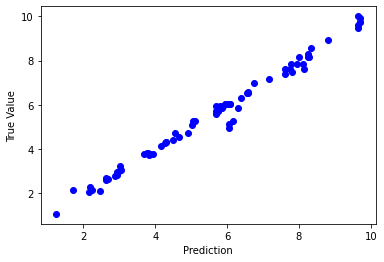

In [327]:
start = time.time()
y_pred = fregr.predict(x_test)
end = time.time()
RandomForestSpeed = end - start
print('time passed : ')
print(RandomForestSpeed)
plt.scatter(y_pred, y_test, color ='b')
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.show()

In [300]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(fregr, x_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

c:\Users\hochi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\hochi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\hochi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Cross Validation Scores:  [0.96723379 0.92283981 0.96637014 0.96907388 0.98854077]
Average CV Score:  0.9628116789508493
Number of CV Scores used in Average:  5


c:\Users\hochi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\hochi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [305]:
print('Time comparison')
print('Ridge')
print('Random Forest')

hello
0.001001119613647461
